# **Principle Component Analysis (PCA)**

# **Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [ ]:
!pip install kneed

# **Data Understanding & Preparation**

## **Load Dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [ ]:
# Check shape of the dataset
df.shape

(300, 16)

In [ ]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

In [ ]:
# View the statistical summary of numerical variables
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


## **Data Cleaning**

In [ ]:
# Check missing values
df.isnull().sum()

,0
student_id,0
name,0
age,0
gender,0
quiz1_marks,0
quiz2_marks,0
quiz3_marks,0
total_assignments,0
assignments_submitted,300
midterm_marks,0


## **Drop Columns**

In [ ]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'student_id': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

In [ ]:
columns_to_drop = ['student_id', 'name', 'total_assignments', 'assignments_submitted', 'total_lectures', 'total_lab_sessions']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,Male,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,Male,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,Female,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,Male,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,Female,5.9,6.3,2.0,23.8,31.0,2.53,7,4


## **Check Data Information**

In [ ]:
# View summary of dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                300 non-null    int64  
 1   gender             300 non-null    object 
 2   quiz1_marks        300 non-null    float64
 3   quiz2_marks        300 non-null    float64
 4   quiz3_marks        300 non-null    float64
 5   midterm_marks      300 non-null    float64
 6   final_marks        300 non-null    float64
 7   previous_gpa       300 non-null    float64
 8   lectures_attended  300 non-null    int64  
 9   labs_attended      300 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 23.6+ KB


In [ ]:
# View the statistical summary of numerical variables
df_cleaned.describe()

,age,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,21.550000,7.254667,5.866667,5.469000,19.969000,37.375000,2.806033,6.013333,3.110000
std,2.241483,1.611791,2.414786,2.711083,8.272229,11.796774,0.732694,3.726407,1.982676
min,18.000000,2.800000,0.000000,0.000000,0.000000,0.000000,0.610000,0.000000,0.000000
25%,20.000000,6.075000,4.000000,3.600000,14.225000,29.875000,2.327500,3.000000,1.000000
50%,22.000000,7.300000,5.800000,5.600000,21.350000,39.600000,2.800000,6.000000,3.000000
75%,23.000000,8.400000,7.700000,7.200000,27.425000,49.550000,3.320000,9.000000,5.000000
max,25.000000,10.000000,10.000000,10.000000,30.000000,50.000000,4.000000,12.000000,6.000000


## **Data Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Re-initialize df_encoded from df to ensure original column is present
df_encoded = df_cleaned.copy()

# One hot map for nominal attribute encoding
one_hot_map = {
    'gender': {'Male': 0, 'Female': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

In [ ]:
df_encoded.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,19,0,8.0,5.7,7.4,30.0,36.5,2.57,4,1
1,21,0,10.0,7.9,4.1,25.4,33.0,2.40,1,5
2,19,1,7.5,1.2,0.3,14.4,24.8,2.99,0,0
3,21,0,5.2,2.5,9.9,17.7,41.0,1.68,9,0
4,21,1,5.9,6.3,2.0,23.8,31.0,2.53,7,4


# **Exploratory Data Analysis**

## **Distribution of Numeric Variables**

In [ ]:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
if 'gender' in numerical_cols:
    numerical_cols.remove('gender')

print(f"Numerical columns (excluding gender): {numerical_cols}")

Numerical columns (excluding gender): ['age', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'labs_attended']


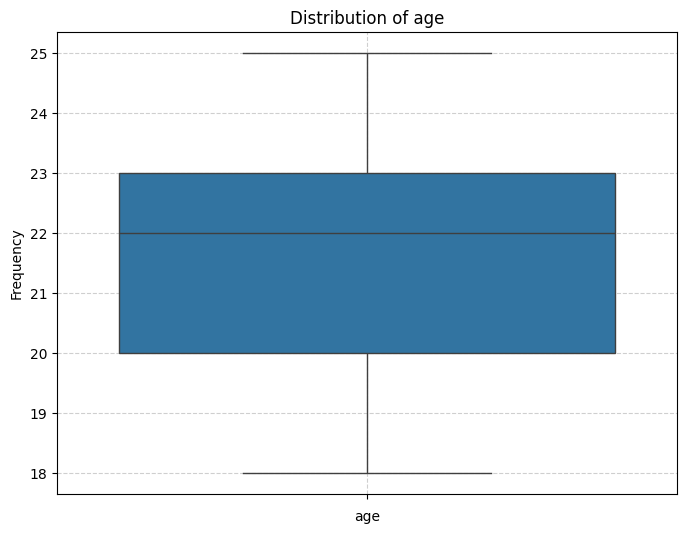

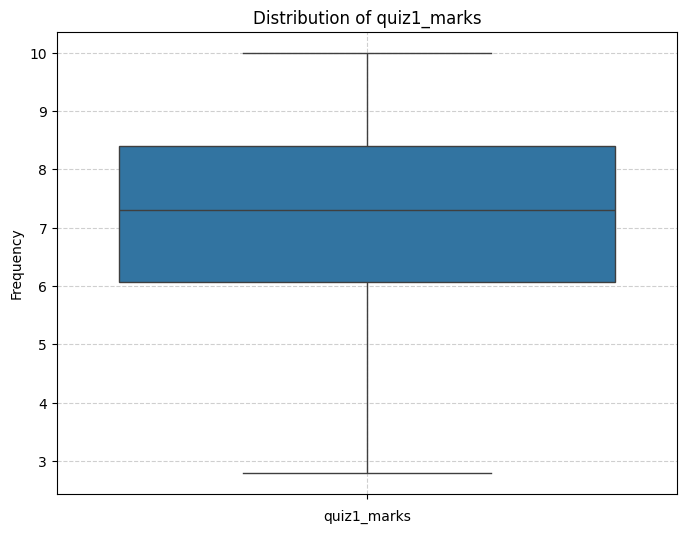

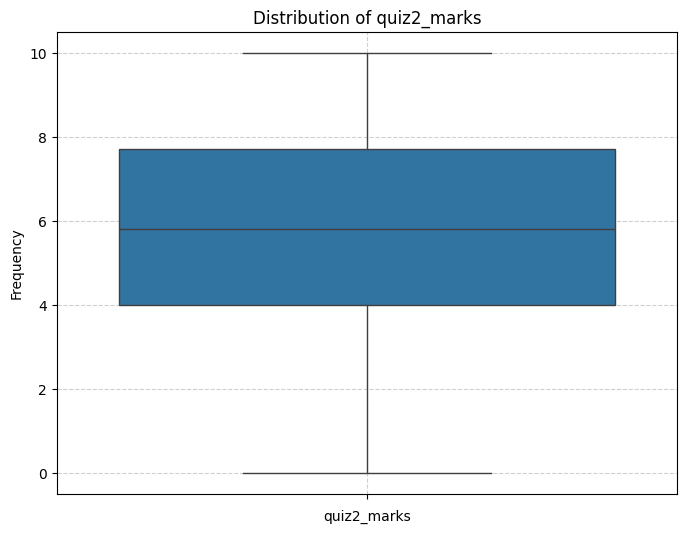

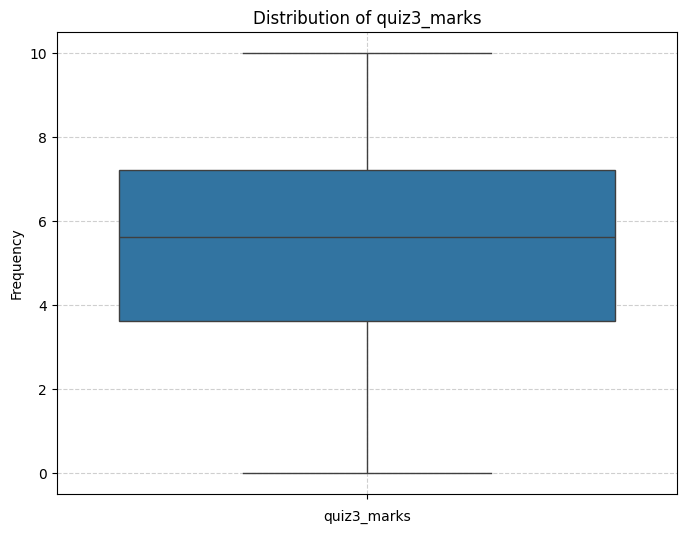

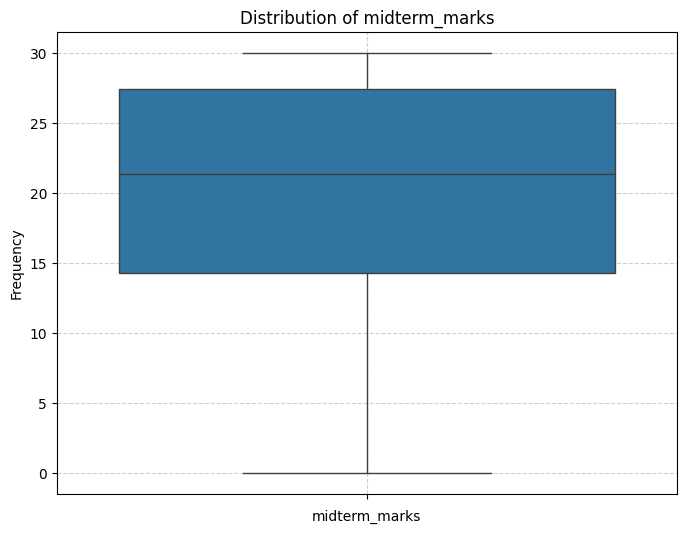

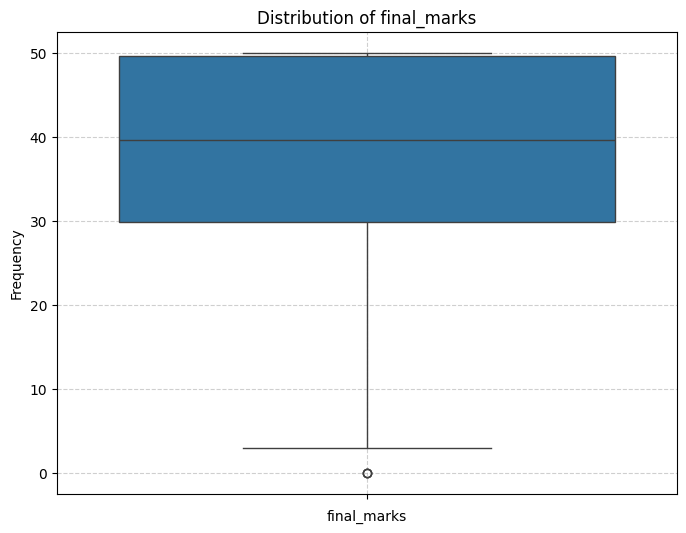

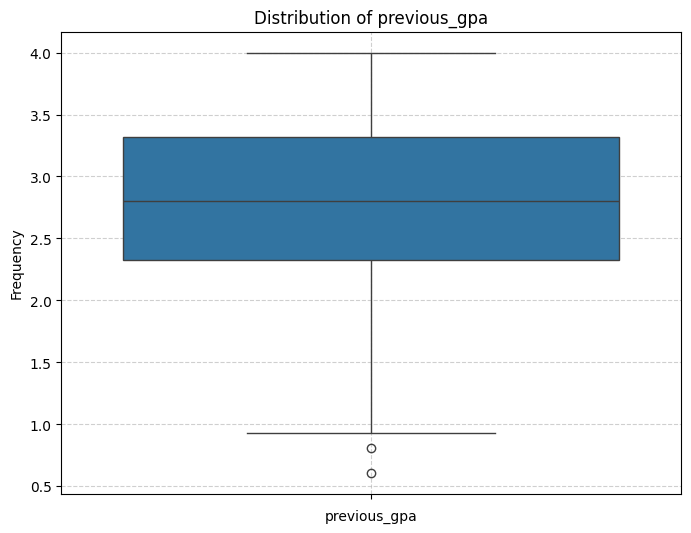

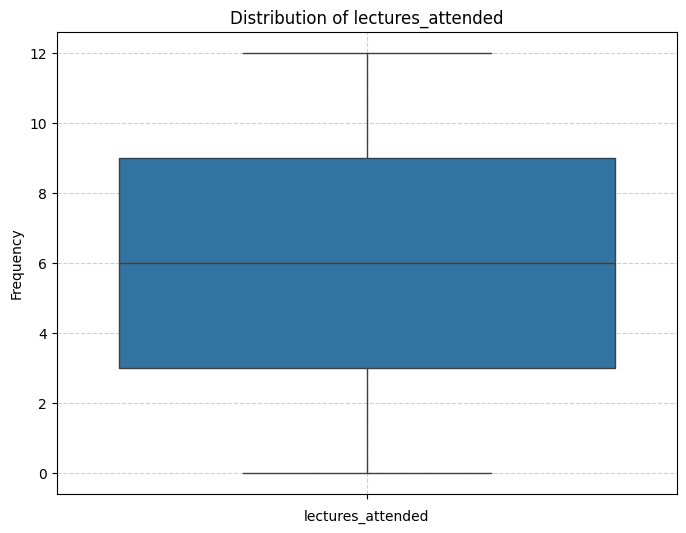

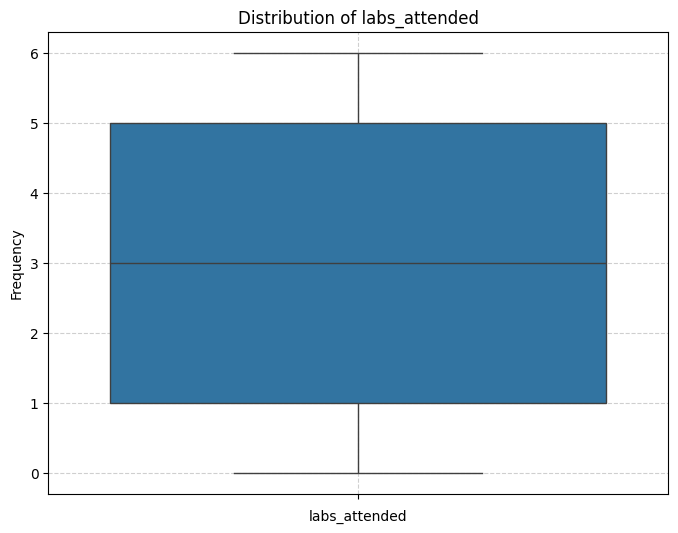

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_encoded[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

From all of the box plots displayed above, all of the box plots visualize a roughly normal distribution of the data, except `final_marks` and `previous_gpa`. Both of these variables show the presence of outliers.

For `final_marks`:
*   There is at least one extreme low-value outlier (close to 0), which is far removed from the rest of the distribution.
*   The lower whisker is much longer than the upper whisker, suggesting a left-skewed distribution (more low-end spread).
*   The median is closer to the upper quartile, further indicating that the bulk of students performed moderately to well, but a few performed very poorly.
*   The general level of performance appears fairly strong overall, since the central 50% of scores fall between approximately 30 and 50.

For `previous_gpa`:
*   There are a couple of low-value outliers (around 0.6-0.8), indicating a few students previously had very low GPAs.
*   The whiskers are somewhat uneven, with a longer lower whisker. This points to a slight left skew, though much less pronounced than in `final_marks`.
*   The median GPA is around 2.8-3.0, meaning that most students have a moderate to good academic history.
*   The majority of previous GPAs fall between roughly 2.3 and 3.3, suggesting relatively consistent performance among most students, aside from the few low outliers.

Overall, both variables show the existence of students who perform significantly below the main cluster (clear low-end outliers). Most students demonstrate reasonably good academic performance, with relatively tight interquartile ranges for previous_gpa and a wider but still centered distribution for final_marks. The slight left skew in both variables suggests that weaker performances are more spread out or variable than stronger performances.

## **Correlation Heatmap among Key Performance Variables**

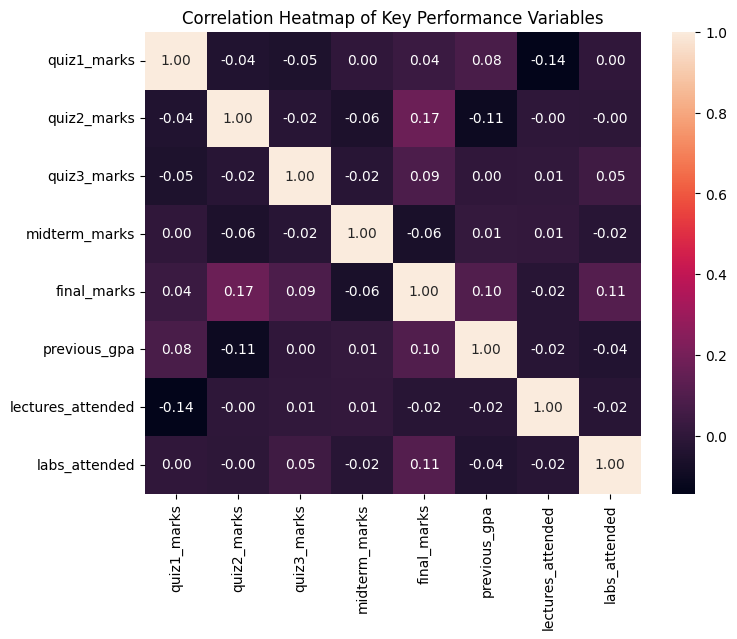

In [ ]:
plt.figure(figsize=(8,6))
corr_vars = ["quiz1_marks", "quiz2_marks", "quiz3_marks", "midterm_marks", "final_marks", "previous_gpa", "lectures_attended", "labs_attended"]
corr = df_encoded[corr_vars].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Key Performance Variables")
plt.show()

The correlation heatmap shows that most performance variables—quizzes, midterm, final marks, GPA, and attendance—exhibit very weak linear relationships with one another. The correlations range mostly between -0.10 and +0.15, indicating that no single assessment or attendance measure strongly predicts another. A small positive relationship exists between quiz2 marks and final marks, as well as between labs attended and final marks, suggesting that frequent engagement in coursework may offer slight benefits. However, the overall low correlation levels imply that student performance is influenced by a wide range of factors beyond these isolated academic indicators.

For teaching, this suggests that relying on a single metric (e.g., quizzes or attendance) to estimate a student's final success may not be effective. A more holistic approach—considering motivation, study habits, and instructional quality—may be needed to support learners more effectively.

## **Scatter Plot of `previous_gpa` vs `final_marks`**

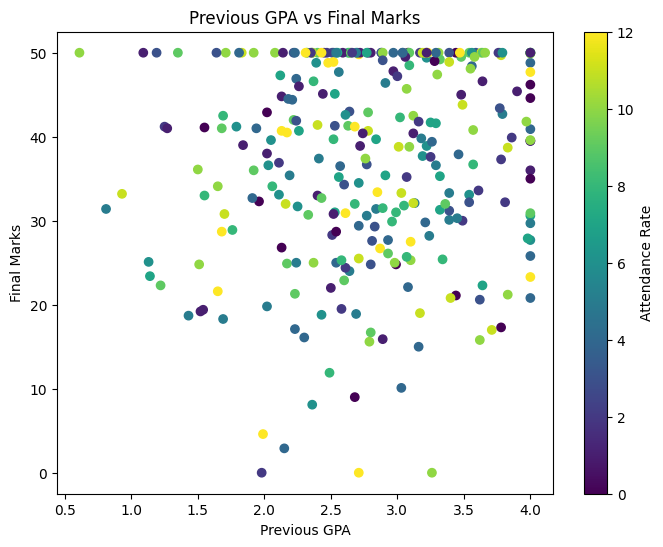

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_encoded["previous_gpa"],
    df_encoded["final_marks"],
    c=df_encoded["lectures_attended"]
)
plt.xlabel("Previous GPA")
plt.ylabel("Final Marks")
plt.title("Previous GPA vs Final Marks")
plt.colorbar(label="Attendance Rate")
plt.show()

The scatter plot of previous GPA versus final marks shows a very diffuse pattern with no strong upward trend, indicating that prior academic performance is only a weak predictor of final exam outcomes in this course. Students with similar GPAs achieve a wide range of final marks, from very low to perfect scores. The color gradient (lecture attendance) also does not reveal a clear pattern—students with both high and low attendance rates appear across the full spectrum of final marks. This suggests that neither previous academic background nor attendance alone guarantees strong performance.

For teaching and learning, this highlights the importance of targeted instructional methods: students may benefit from more personalized learning support, clearer feedback, or more consistent reinforcement of key concepts, since traditional predictors of performance (GPA and attendance) do not fully explain success in this course.

# **Data Transformation & PCA**

## **Data Scaling**

In [ ]:
scaler = StandardScaler()

df_transformed = df_encoded.copy()

# Apply StandardScaler to the identified numerical columns
df_transformed = scaler.fit_transform(df_transformed)

# Convert the numpy array back to a DataFrame with original column names for display
df_transformed = pd.DataFrame(df_transformed, columns=df_encoded.columns)

# Display the head of the transformed DataFrame to verify
df_transformed.head()

,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended
0,-1.139540,-1.033908,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997
1,-0.245783,-1.033908,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850
2,-1.139540,0.967204,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208
3,-0.245783,-1.033908,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208
4,-0.245783,0.967204,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638


## **PCA**

In [ ]:
pca = PCA(n_components=10)

pca.fit_transform(df_transformed)

array([[-0.97007566,  0.2512717 , -0.25805316, ..., -0.85514088,
         0.45257755, -0.12896213],
       [-0.45724346,  1.36835954, -1.83594652, ..., -0.2551258 ,
         0.22929964, -0.80266358],
       [-1.96403679,  1.12191215,  1.15890334, ...,  1.86424152,
         0.21494869,  0.84807189],
       ...,
       [ 1.45037555, -1.72779316, -0.85169893, ...,  2.05382793,
        -0.84592089, -0.09354937],
       [ 0.19650367,  0.58542457, -1.07754827, ..., -0.28224409,
        -1.59742038, -1.04536431],
       [ 0.4313977 , -0.12781585, -0.27204428, ..., -0.95386868,
        -0.22568525,  0.57699358]])

Once we have our PCA done, we can extract the proportion of variance explained and the eigenvalues as follows.

In [ ]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

We will plot the scree plot using the proportion of variance explained.

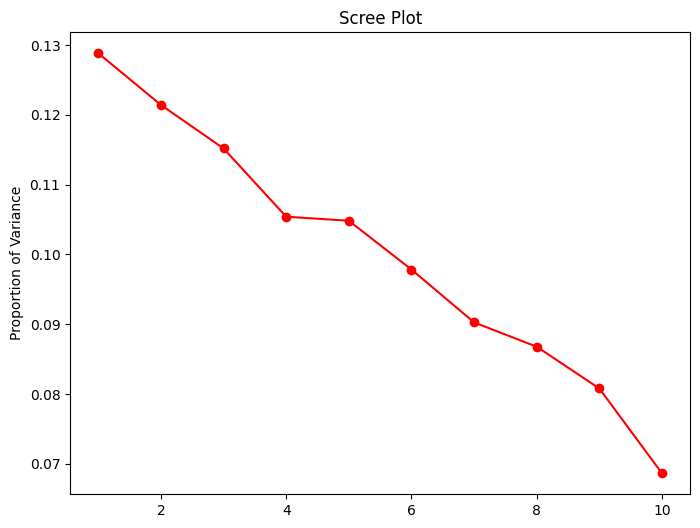

In [ ]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.figure(figsize=(8, 6))
plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.title('Scree Plot')
plt.ylabel('Proportion of Variance')
plt.show()

In [ ]:
pca_full = PCA().fit(df_transformed)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained*100, cum_explained*100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 12.88%  |  Cumulative: 12.88%
PC02: 12.14%  |  Cumulative: 25.02%
PC03: 11.52%  |  Cumulative: 36.54%
PC04: 10.54%  |  Cumulative: 47.08%
PC05: 10.48%  |  Cumulative: 57.57%
PC06: 9.78%  |  Cumulative: 67.35%
PC07: 9.03%  |  Cumulative: 76.38%
PC08: 8.68%  |  Cumulative: 85.06%
PC09: 8.08%  |  Cumulative: 93.14%
PC10: 6.86%  |  Cumulative: 100.00%


Based on the result, the 8 principal components account for 12.88% + 12.14% + 11.52% + 10.54% + 10.48% + 9.78% + 9.03% + 8.68% = 85.06% of the variance in the data.

Since 85.06% is a considerable amount (>80%), it is sufficient to retain the eight principal components in the analysis.

In [ ]:
pca = PCA(n_components=8)
PC = pca.fit_transform(df_transformed)

Next, we store the component scores in a DataFrame and check it via the head() method.

In [ ]:
df_pca = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.970076,0.251272,-0.258053,-0.062800,0.222625,0.235991,-1.994340,-0.855141
1,-0.457243,1.368360,-1.835947,-0.729976,0.223127,1.337209,-0.170171,-0.255126
2,-1.964037,1.121912,1.158903,-2.088251,-0.433858,-0.993234,-0.394735,1.864242
3,-0.905380,-1.742435,-0.160315,1.173438,0.828061,-1.455974,-1.314544,-0.528984
4,-0.263028,-0.942491,0.606325,-0.768840,-0.450677,1.027836,0.575022,0.855673


## **PCA Visualizations**

Now, we can form the biplot.

In [ ]:
def biplot(score,coef,labels=None, colors=None):

    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    if colors is not None:
        unique_clusters = np.unique(colors)
        for cluster_label in unique_clusters:
            # Filter points belonging to the current cluster
            cluster_mask = (colors == cluster_label)
            plt.scatter(xs[cluster_mask] * scalex,
                        ys[cluster_mask] * scaley,
                        s=5,
                        label=f'Cluster {int(cluster_label)}')
        plt.legend()
    else:
        plt.scatter(xs * scalex,ys * scaley,
                    s=5,
                    color='orange') # Changed 'color' to 'c' and used 'colors' parameter

    for i in range(n):
        plt.arrow(0, 0, coef[i,0],
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.2, # Adjusted position
                 coef[i,1] * 1.2, # Adjusted position
                 labels[i],
                 color = 'darkblue',
                 ha = 'center',
                 va = 'center')
    # --------------------------------------
    # ADD DOTTED REFERENCE LINES (like example)
    # --------------------------------------
    plt.axhline(0, color='black', linestyle='dotted', linewidth=1)
    plt.axvline(0, color='black', linestyle='dotted', linewidth=1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

After defining our function, we have to call it.

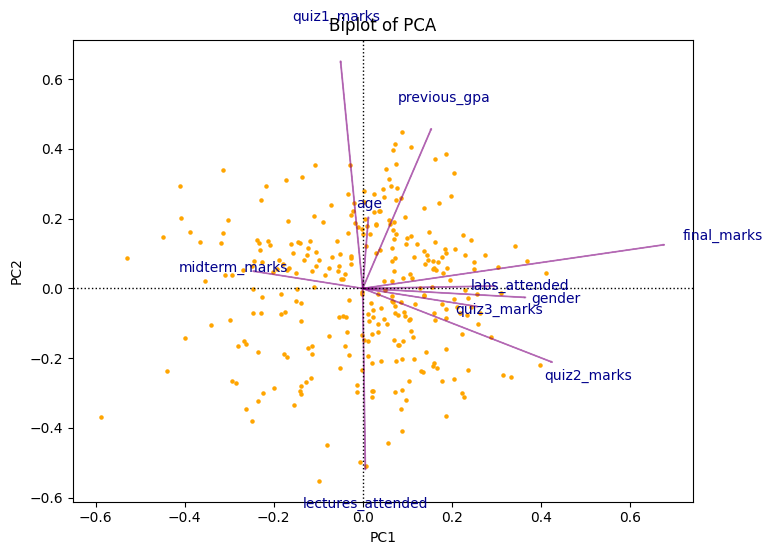

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Biplot of PCA')

biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns))

**PC1 (horizontal axis)**

PC1 represents a general academic performance and engagement dimension, because variables such as `final_marks`, `quiz2_marks`, `quiz3_marks, and `labs_attended` point strongly in the positive horizontal direction. These variables all measure how well students are performing in assessments or how actively they participate in coursework, meaning that students with high PC1 scores tend to show stronger overall academic achievement and involvement.

The most important variables in PC1 are `final_marks`, `quiz2_marks`, and `previous_gpa`.

**PC2 (vertical axis)**

PC2 represents a preparedness and background versus attendance dimension, driven mainly by `previous_gpa`, `quiz1_marks`, and `age`, which point upward, while lectures attended points downward. This indicates that students with high PC2 scores typically have stronger prior academic preparation and may be slightly older, but tend to attend fewer lectures, whereas students with low PC2 scores attend lectures more consistently but may have lower prior academic performance.

The most important variables in PC2 are `quiz1_marks`, `final_marks`, and `previous_gpa`.

# **K-Means Clustering**

## **Elbow Method**

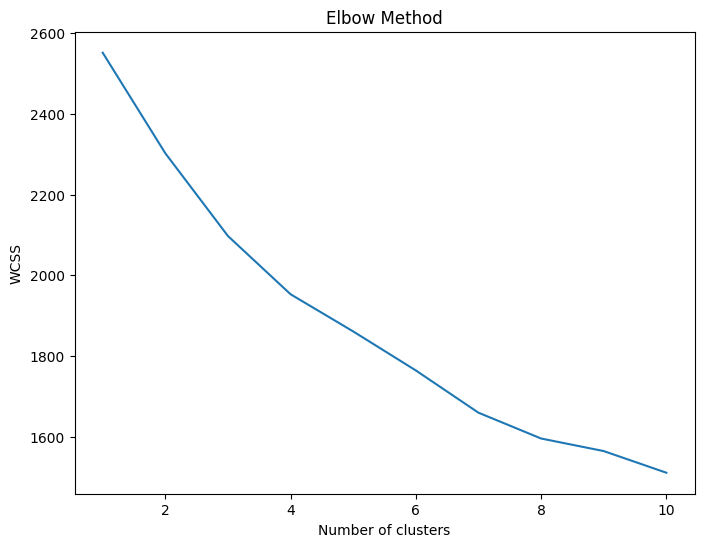

In [ ]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  2551.662715
1                   2  2302.291126
2                   3  2097.107129
3                   4  1952.708394
4                   5  1860.515083
5                   6  1763.806878
6                   7  1659.037766
7                   8  1595.024202
8                   9  1563.845563
9                  10  1510.186332


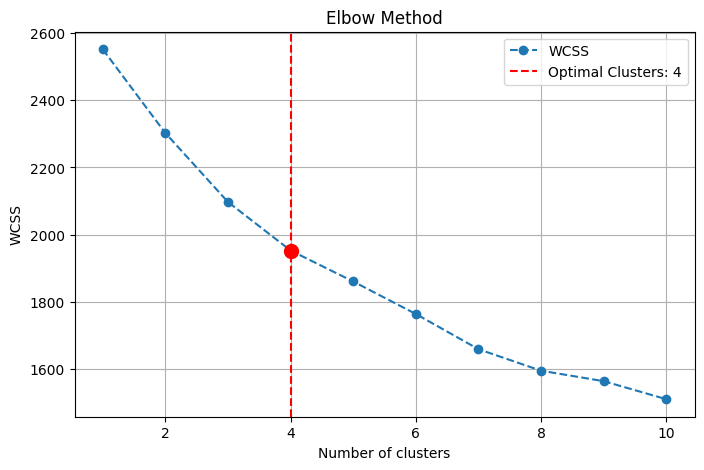

The optimal number of clusters is: 4


In [ ]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

## **Fit Model**

In [ ]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster
df_transformed['KMeans'] = kmeans_cluster

## **Silhouette Score**

In [ ]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.1037386344057563


# **Cluster Profiling & Educational Recommendations**

## **Visualizations**

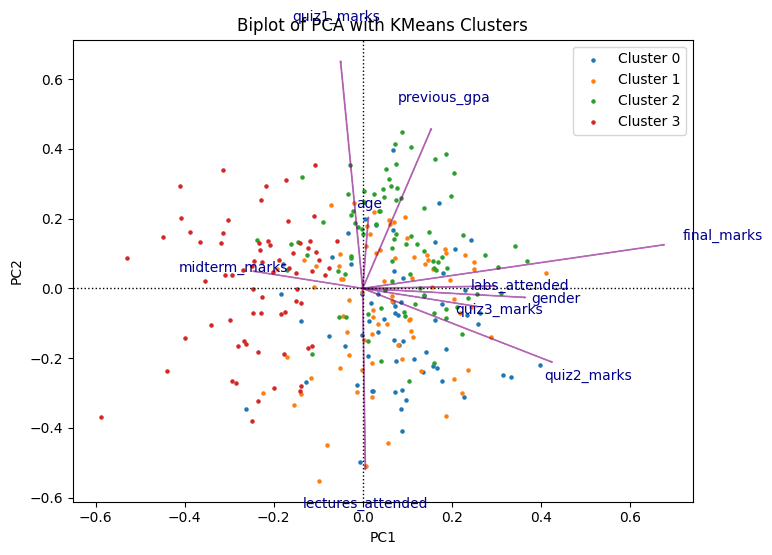

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Biplot of PCA with KMeans Clusters')
biplot(PC,
       np.transpose(pca.components_),
       list(df_transformed.columns),
       colors=df_transformed['KMeans'])
plt.show()

In [ ]:
df = df.drop(columns=['assignments_submitted'])
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,30.0,36.5,2.57,12,4,6,1,3
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,25.4,33.0,2.40,12,1,6,5,1
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,14.4,24.8,2.99,12,0,6,0,3
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,17.7,41.0,1.68,12,9,6,0,1
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,23.8,31.0,2.53,12,7,6,4,0


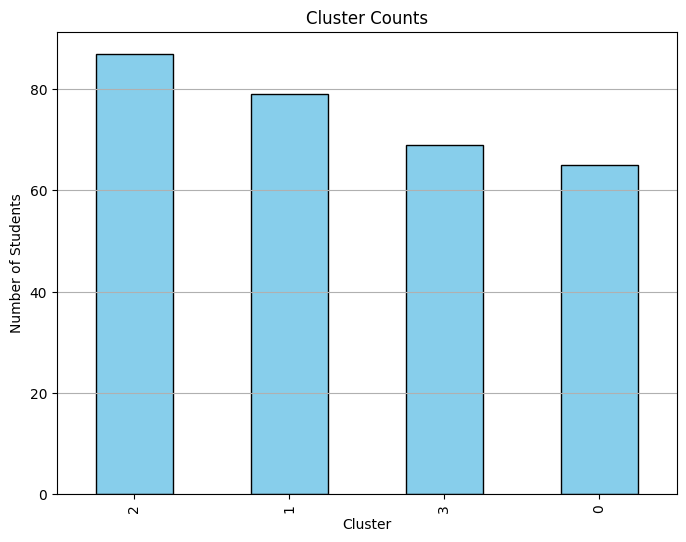

In [ ]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.show()

## **Interpretation**

## **Cluster 0 - Moderate Performance & Low Engagement (Blue)**
**Characterised by:**
*   Moderate quiz and midterm performance
*   Somewhat lower attendance (lectures + labs)
*   Mid-range final marks

**Interpretation:**

Cluster 0 points lie slightly toward the lower-PC2 region and near the center of PC1, where vectors for `quiz2_marks`, `quiz3_marks`, and `lectures_attended` point downward/right. This suggests these students tend to have average academic performance but slightly lower engagement (attendance) and moderate quiz scores. They are not failing but are at risk of slipping if course difficulty increases.

**Recommendations:**
*   Provide optional attendance-boosting interventions (reminder systems, participation incentives).
*   Offer early-semester quiz practice workshops to raise foundational understanding.
*   Monitor progress mid-term and provide targeted one-on-one check-ins.

## **Cluster 1 - Consistent, Well-Prepared Achievers (Orange)**
**Characterised by:**
*   Higher previous GPA
*   Higher lab attendance
*   Moderate-to-high final marks
*   Good overall course engagement

**Interpretation:**

Cluster 1 points lie in the upper-right region, aligned with `previous_gpa`, `labs_attended`, `age`, and mildly with `final_marks`. This cluster reflects well-prepared, mature, and consistent students who benefit from strong habits (attendance, lab completion). They are not the absolute top performers but are stable, reliable achievers.

**Recommendations:**
*   Encourage participation in peer-mentoring roles (tutoring lower clusters).
*   Provide pathways into undergraduate research or advanced electives.
*   Offer recognition programs to maintain motivation and retention.

## **Cluster 2 - High Achievers with Strong Exam Performance (Green)**
**Characterised by:**
*   High midterm marks
*   High final marks
*   Strong quiz performance
*   Mixed attendance but high overall academic output

**Interpretation:**

Cluster 2 lies toward the right side of PC1, strongly aligned with `final_marks` and somewhat with quiz/ midterm vectors. These students achieve excellent academic results despite varying attendance, indicating high intrinsic ability or strong self-study skills. Cluster 2 likely represents the top performers or high achievers.

**Recommendations:**
*   Create honors/advanced tracks or accelerated project opportunities.
*   Offer leadership roles in learning communities or as SI (Supplemental Instruction) leaders.
*   Encourage participation in competitions, internships, or capstone-level work.

## **Cluster 3 - At-Risk & Underperforming Students (Red)**
**Characterised by:**
*   Low quiz scores (esp. quiz2, quiz3)
*   Lower midterm and final marks
*   Relatively low attendance and low previous GPA

**Interpretation:**

Cluster 3 points are concentrated in the lower-left quadrant, opposite to vectors for `final_marks`, `previous_gpa`, and `labs_attended`. This strongly suggests these students experience academic difficulty across multiple areas, driven by both lower preparation (`previous_gpa`) and weak course engagement. This cluster represents the highest-risk subgroup.

**Recommendations:**
*   Mandatory remedial support (study skills workshops, structured tutoring).
*   Attendance accountability programs (e.g., required check-ins, attendance contracts).
*   Early alert system to flag failing quiz/midterm patterns before finals.